## >> IMPORTING OUR PACKAGES

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## >>IMPORTING OUR DATASET

In [2]:
fraud=pd.read_csv("Fraud.csv")
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## >>DATA CLEANSING

#### >>DEALING WITH NULL VALUES

In [29]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

##### >> NO NULL VALUES FOUND

#### >> DEALING WITH OUTLIERS

In [3]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
cleandata=fraud
cleandata=remove_outlier(fraud,"amount")
cleandata=remove_outlier(fraud,"oldbalanceOrg")
cleandata=remove_outlier(fraud,"newbalanceDest")
cleandata=remove_outlier(fraud,"newbalanceOrig")
cleandata=remove_outlier(fraud,"oldbalanceDest")
cleandata['nameDest']=pd.DataFrame(cleandata['nameDest'].str[0])
cleandata['nameOrig']=pd.DataFrame(cleandata['nameOrig'].str[0])
cleandata

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C,170136.00,160296.36,M,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C,21249.00,19384.72,M,0.00,0.00,0,0
2,1,TRANSFER,181.00,C,181.00,0.00,C,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C,181.00,0.00,C,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C,41554.00,29885.86,M,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362614,743,TRANSFER,339682.13,C,339682.13,0.00,C,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C,339682.13,0.00,C,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C,6311409.28,0.00,C,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C,6311409.28,0.00,C,68488.84,6379898.11,1,0


## >>EXPOLORING THE DATA (EDA).

<AxesSubplot:xlabel='step', ylabel='isFraud'>

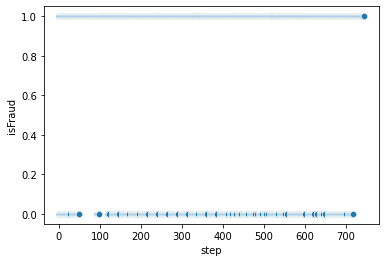

In [4]:
sns.scatterplot(cleandata.step,cleandata.isFraud)

    >>NO SIGNIFICANT INFORMATION

<AxesSubplot:xlabel='type', ylabel='isFraud'>

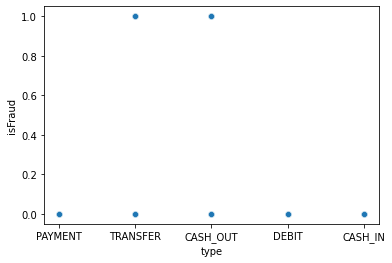

In [5]:
sns.scatterplot(cleandata.type,cleandata.isFraud)

    >>FRAUDS OCCUR EITHER IN TRANFER TYPE OR CASHOUT TYPE TRANSACTIONS

<AxesSubplot:xlabel='amount', ylabel='isFraud'>

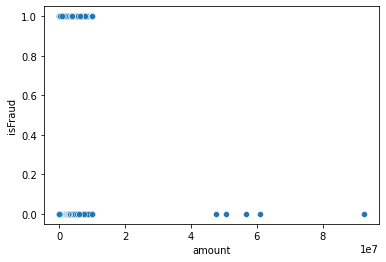

In [6]:
sns.scatterplot(cleandata.amount,cleandata.isFraud)

    >>NO SIGNIFICANT INFORMATION

<AxesSubplot:xlabel='nameOrig', ylabel='isFraud'>

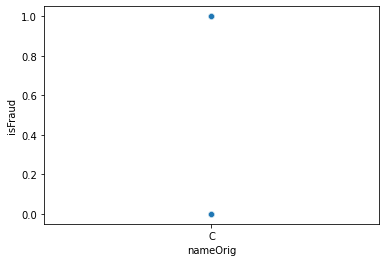

In [7]:
sns.scatterplot(cleandata.nameOrig,cleandata.isFraud)

     >>NO SIGNIFICANT INFORMATION

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='isFraud'>

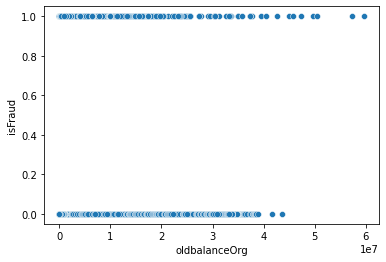

In [8]:
sns.scatterplot(cleandata.oldbalanceOrg,cleandata.isFraud)

     >>NO SIGNIFICANT INFORMATION

<AxesSubplot:xlabel='newbalanceOrig', ylabel='isFraud'>

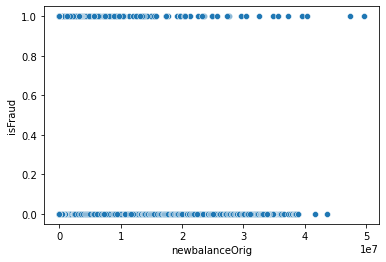

In [9]:
sns.scatterplot(cleandata.newbalanceOrig,cleandata.isFraud)

     >>NO SIGNIFICANT INFORMATION

<AxesSubplot:xlabel='nameDest', ylabel='isFraud'>

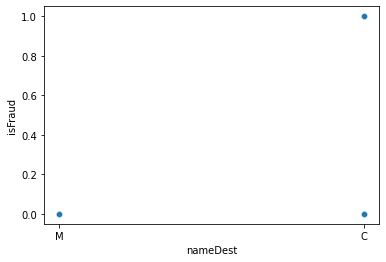

In [10]:
sns.scatterplot(cleandata.nameDest,cleandata.isFraud)

    >>FRAUDS OCCUR ONLY IN NAMEDEST WITH INITIAL C

<AxesSubplot:xlabel='oldbalanceDest', ylabel='isFraud'>

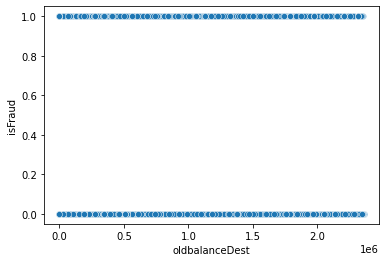

In [11]:
sns.scatterplot(cleandata.oldbalanceDest,cleandata.isFraud)

    >>NO SIGNIFICANT INFORMATION

<AxesSubplot:xlabel='newbalanceDest', ylabel='isFraud'>

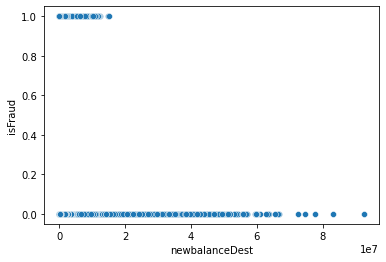

In [12]:
sns.scatterplot(cleandata.newbalanceDest,cleandata.isFraud)

    >>SMALLER NEWBALADEST HAS A LOT OF FRAUDS

# DEDUCTION 1.
##### 1. FRAUDS OCCUR IN TRANSFER AND CASH_OUT  TYPE TRANSACTIONS, BECAUSE TO STEAL CASH, WITHDRAWL OF MONEY IS NEEDED.
##### 2. DESTINATIONS WITH C INITIAL LETTER HAS ALL THE FRAUDS, IT MAYBE SO BECAUSE ALL THE FRAUDS ARE WORED TO A CERTAIN KIND OF ACCOUNT THAT IS PROTECTED FROM BEING TAILED.
##### 3. DESTINATION ACCOUNTS WITH SMALLER NEW BALANCES HAVE MORE CHANCES OF BEING FRAUD, AS THESE ACCOUNTS MAY BE CRATED FOR THIS ONE TIME PURPOSE ONLY. 

<AxesSubplot:xlabel='type', ylabel='amount'>

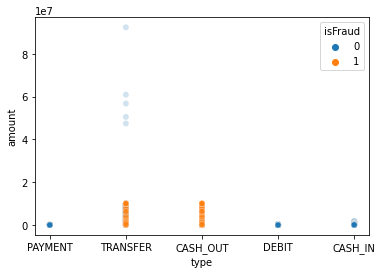

In [13]:
sns.scatterplot(cleandata.type, 
                cleandata.amount,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='type', ylabel='oldbalanceOrg'>

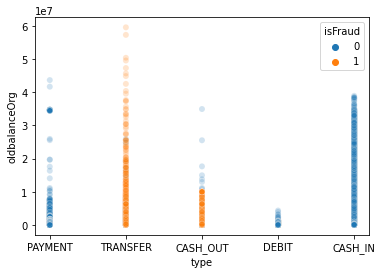

In [14]:
sns.scatterplot(cleandata.type,
                cleandata.oldbalanceOrg,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='type', ylabel='newbalanceOrig'>

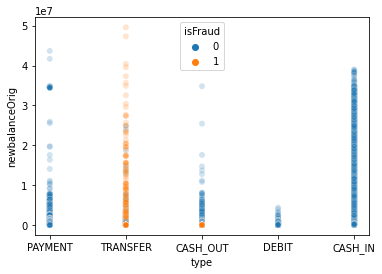

In [15]:
sns.scatterplot(cleandata.type,
                cleandata.newbalanceOrig,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='type', ylabel='newbalanceOrig'>

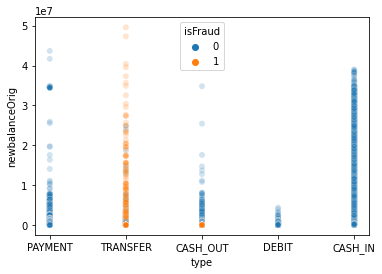

In [16]:
sns.scatterplot(cleandata.type,
                cleandata.newbalanceOrig,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='type', ylabel='nameDest'>

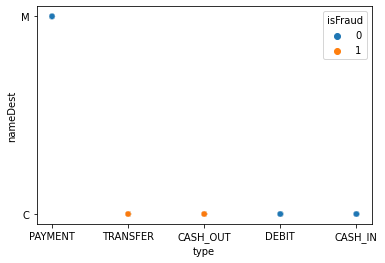

In [17]:
sns.scatterplot(cleandata.type,
                cleandata.nameDest,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='nameDest', ylabel='amount'>

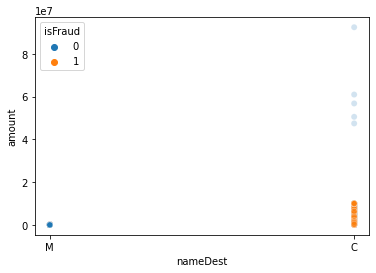

In [18]:
sns.scatterplot(cleandata.nameDest,
                cleandata.amount,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='nameDest', ylabel='newbalanceOrig'>

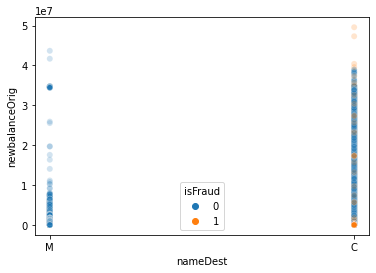

In [19]:
sns.scatterplot(cleandata.nameDest,
                cleandata.newbalanceOrig,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='newbalanceOrig', ylabel='amount'>

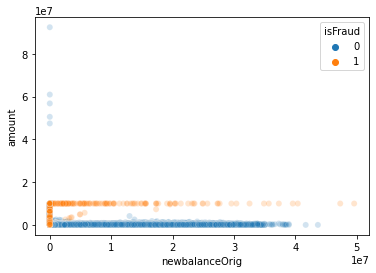

In [20]:
sns.scatterplot(cleandata.newbalanceOrig,
                cleandata.amount,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='amount'>

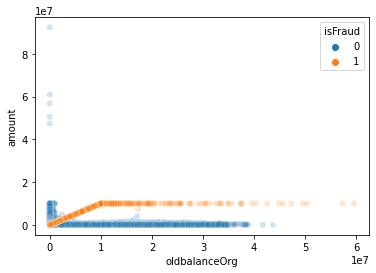

In [21]:
sns.scatterplot(cleandata.oldbalanceOrg,
                cleandata.amount,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='newbalanceDest', ylabel='amount'>

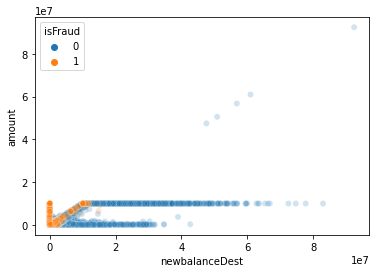

In [22]:
sns.scatterplot(cleandata.newbalanceDest,
                cleandata.amount,
                hue=cleandata.isFraud,
                alpha=0.2
               )

<AxesSubplot:xlabel='newbalanceDest', ylabel='type'>

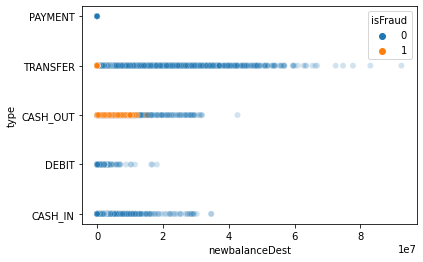

In [23]:
sns.scatterplot(cleandata.newbalanceDest,
                cleandata.type,
                hue=cleandata.isFraud,
                alpha=0.2
               )

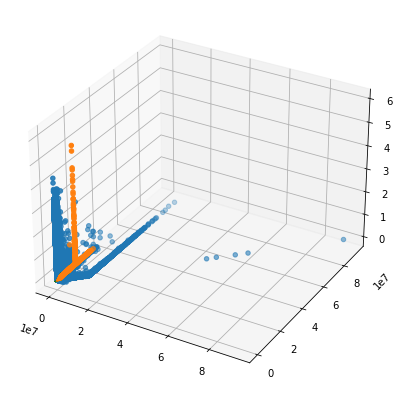

In [24]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
colors={0:'tab:blue', 1:'tab:orange'}
ax.scatter3D(cleandata.amount,
             cleandata.newbalanceDest,
             cleandata.oldbalanceOrg,
             c=cleandata.isFraud.map(colors)
            )
plt.show()

# DEDUCTION 2 >>
    1. AMOUNT IN FRAUD TRANSACTIONS INCREASES LINEARLY WITH OLDBALANCEORG, AND THEN BECOMES CONSTANT.
    2. AMOUNT AND NEWBLANCEDEST SHOWS A GREAT CONCENTRATION OF FRAUDS AT BOTTOM LEFT OF THE CHART
    3. AMOUNT SHOWS RELATION WITH BOTH NEWBALANCEDEST AND OLDBALANCEORG IN THE 3D PROJECTION.
#### IT MUST BE NOTED THAT TRANSACTIONS TO NEW ACCOUNTS WITH LOW FINAL BALANCES SEEM SUSPICIOUS.. 

# FEATURE SELECTION >>
    FROM MY EDA ABOVE, I PREFER TO CHOOSE THE FOLLOWING FEATURES:
                                                                  1. TYPE
                                                                  2. AMOUNT
                                                                  3. OLDBALANCEORG
                                                                  4. NEWBALANCEDEST
                                                                  5. NAMEDEST

## PREPARATION OF FINAL DATA >>

In [4]:
##ONE HOT ENCODING FOR DISCRETE DATA.
dummy_type = pd.get_dummies(cleandata['type'])
dummytype2= pd.get_dummies(cleandata['nameDest'])

##PREPARING NUMERIC DATA.
numericdata=cleandata[['amount','oldbalanceOrg','newbalanceDest','isFraud']]

##FINAL DATA: ALLDATA
alldata=pd.concat([dummy_type,dummytype2, numericdata],axis=1)
k=alldata.columns
alldata

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M,amount,oldbalanceOrg,newbalanceDest,isFraud
0,0,0,0,1,0,0,1,9839.64,170136.00,0.00,0
1,0,0,0,1,0,0,1,1864.28,21249.00,0.00,0
2,0,0,0,0,1,1,0,181.00,181.00,0.00,1
3,0,1,0,0,0,1,0,181.00,181.00,0.00,1
4,0,0,0,1,0,0,1,11668.14,41554.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
6362614,0,0,0,0,1,1,0,339682.13,339682.13,0.00,1
6362615,0,1,0,0,0,1,0,339682.13,339682.13,339682.13,1
6362616,0,0,0,0,1,1,0,6311409.28,6311409.28,0.00,1
6362617,0,1,0,0,0,1,0,6311409.28,6311409.28,6379898.11,1


## SCALING THE DATA >>

In [6]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
alldata=scale.fit_transform(alldata)
alldata=scale.fit_transform(alldata)
alldata=pd.DataFrame(alldata)
j=0
for i in k:
    alldata.rename(columns = {j:i}, inplace = True)
    j+=1
alldata

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M,amount,oldbalanceOrg,newbalanceDest,isFraud
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000106,0.002855,0.000000,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000020,0.000357,0.000000,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000002,0.000003,0.000000,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000002,0.000003,0.000000,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000126,0.000697,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5576480,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.003674,0.005701,0.000000,1.0
5576481,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.003674,0.005701,0.003674,1.0
5576482,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.068272,0.105923,0.000000,1.0
5576483,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.068272,0.105923,0.069005,1.0


# MODEL SELECTION
    I WILL BE USING TWO MODELS TO EVALUATE THE DATA:
        1. KNN, WITH NUMERIC VALUES, I THINK IT WILL BE THE BEST FOR THIS CLASSIFICATION.
        2. USING THE NLP MODEL NB WITHOUT USING THE NUMERIC DATA. LETS SEE HOW IT PERFORMS HERE.

## 1. KNN.
        EVEN THOUGH IT IS SAID THAT KNN IS CURSED BY THE FAMOUS DIMENSION CURSE, 
        AFTER ANALYSING THE DATA, I THINK IT'LL DO GOOD.

### TRAIN-TEST SPLIT >>

In [6]:
# USING ALL OUR FEATURES.

X=alldata[
    ['CASH_IN',
     'CASH_OUT',
     'DEBIT',
     'PAYMENT',
     'TRANSFER',
     'C',
     'M',
     'amount',
     'oldbalanceOrg',
     'newbalanceDest'
    ]
]
Y=alldata['isFraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

#### IMPORTING OUR MODEL AND METRICS>>

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
knn=KNeighborsClassifier()

#### FITTING MODEL ON TO DATA >>
##### >>not using gridsearch due to large dataset<<

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### TESTING OUR MODEL >>

In [18]:
y_pred=knn.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[1837499,     152],
       [    578,    2012]], dtype=int64)

In [39]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1837651
         1.0       0.93      0.78      0.85      2590

    accuracy                           1.00   1840241
   macro avg       0.96      0.89      0.92   1840241
weighted avg       1.00      1.00      1.00   1840241



#### SO, THE MODEL WORKS REALLY WELL ON THE TEST DATA.

#### INSIGHTS FROM THE PROJECT: 
1. TRANSFER AND CASHOUT TYPE TRANSACTIONS TO ACCOUNTS WITH INITIAL C MUST BE MONITORED, ON TOP OF THAT SUCH ACCOUNTS WITH LOWER FINAL BALANCES MUST ALSO BE BROUGHT UNDER SUSPICION.

# 2. NAIVE BAYES
    NOW LETS CHOOSE NAIVE BAYES AS OUR MODEL JUST TO PLAY AROUND WITH THE DATA.

### TRAIN-TEST SPLIT >>

In [8]:
# USING ONLY CATEGORICAL DATA

X=alldata[
    ['CASH_IN',
     'CASH_OUT',
     'DEBIT',
     'PAYMENT',
     'TRANSFER',
     'C',
     'M',
     'newbalanceDest'
    ]
]
Y=alldata['isFraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
nbmodel=GaussianNB()

In [14]:
nbmodel.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred=nbmodel.predict(X_test)

In [17]:
cm2=confusion_matrix(y_test,y_pred)
cm2

array([[1100016,  737635],
       [      0,    2590]], dtype=int64)

In [18]:
report2=classification_report(y_test,y_pred)
print(report2)

              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75   1837651
         1.0       0.00      1.00      0.01      2590

    accuracy                           0.60   1840241
   macro avg       0.50      0.80      0.38   1840241
weighted avg       1.00      0.60      0.75   1840241



##### >>OUR MODEL FAILS HERE, IT PREDICTS CORRECTLY THE TRUE POSITIVES, BUT IT IS TERRIBLE WHEN WE LOOK AT THE FALSE POSITIVES DUE TO LACK OF GUIDANCE BY NUMERICAL VALUES.


### SO, OUR LITTLE EXPERIMENT HERE FAILED, BUT ITS OKAY, WE LEARNT A THING OR TWO HERE, DID'NT WE

#### SO OUR PROJECT HERE IS COMPLETED, THE DATA WAS LARGE AND THERE IS A METHOD TO LOAD IT UP IN CHUNKS THAT I AM NOT YET SO FAMILIAR WITH, BUT I REALLY LOOK FORWARD TO WORK FOR INSAID IMPROVING MY SKILLS IN THE PROCESS, HOPE I AM THE CANDIDATE YOU'RE LOOKING FOR. THANKYOU FOR THIS OPPURTUNITY. 